<a href="https://colab.research.google.com/github/Loriane-07/PRA3024AnalysisofBigDatainPhysics/blob/main/Week5_CosmologyMCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style='color:deepskyblue'> Cosmology MCMC notebook </span>

## <span style='color:deepskyblue'>Preliminaries</span>

In [3]:
# Install required packages (if not available on server)
!pip install getdist
import numpy as np
import matplotlib.pyplot as plt

## <span style='color:deepskyblue'> The $\Lambda$CDM Model </span>

The Lambda-Cold-Dark-Matter ($\Lambda$CDM) Model is our concordance cosmological model. It postulates a Universe that behaves according to **General Relativity**, filled with **baryons** (protons, neutrons - the stuff we and stars are made of!), **Cold Dark Matter (CDM)** and a **Cosmological Constant** $\Lambda$.

The expansion of the Universe is best described in terms of the **scale factor** $a$ (the "radius" of the Universe, conventionally set to 1 today) and the **Hubble rate** $H$

$$
H \equiv \frac{\dot a}{a}
$$

The Einstein Equations in a **homogeneous, isotropic** Universe have an especially simple form and a special name, **Friedmann Equation**:

$$
H^2 = \frac{8\pi G}{3}\rho + \frac{k}{a^2}
$$

where $\rho$ is the total energy density of the Universe (at a certain time or size), and $k$ is a universal constant related to the [spatial curvature and shape of the Universe](https://en.wikipedia.org/wiki/Shape_of_the_universe#:~:text=The%20spatial%20curvature%20is%20related,indistinguishable%20spaces%20with%20different%20topologies.). In the $\Lambda$CDM model, this additionally simplifies to

$$
\boxed{
H^2 = H_0^2\left(\Omega_\Lambda + \Omega_m a^{-3} + \Omega_k a^{-2}\right)
}
\qquad
\qquad
\Omega_m + \Omega_\Lambda + \Omega_k = 1
$$

$H_0$ is the value of the Hubble rate *today*, and the parameters $\Omega_m$, $\Omega_\Lambda$ and $\Omega_k$ are dimensionless quantities indicating how much of the present expansion of the Universe is due to (non-relativistic) matter, cosmological constant $\Lambda$, and spatial curvature $k$. Note that the three $\Omega$'s are *not independent* (their sum is 1) and that we grouped together the contribution of baryons and CDM,

$$
\Omega_m = \Omega_{\rm CDM} + \Omega_{\rm b}
$$

and that we have evidence that independent evidence that $\Omega_b \approx 5$\%. Note that only $\Omega_m \geq 0$ makes physical sense, while in principle both $\Omega_\Lambda$ and $\Omega_k$ can be negative.

The present Hubble rate is conventionally parametrised in terms of the dimensionless $h$:

$$
H_0 \equiv h\,\frac{\text{km}}{\text{s Mpc}}
$$

where Mpc = Megaparsec and [parsec](https://en.wikipedia.org/wiki/Parsec) equals to about $3.26$ light years or $3.086 \cdot 10^{13}$ m. 

In essence, these equations give us the relation between *what exists in the Universe* and *how the Universe expanded*. Measure one, I can tell you the other. This is precisely what we aim to do!

Time to define the function $H(z)$. Don't forget to include the useful parameters as arguments of the function, and to define `parsec`.

In [4]:
PARSEC = 3.086*(10**19)  # <--- YOUR CODE GOES HERE!

H_0 = 70000/PARSEC

# Hubble rate
def Hubble(H_0, omega_lam, omega_m, omega_k, a): # Hubble(arg0, arg1, arg2, etc...)
  hubble = (H_0**2)*(omega_lam+ (omega_m*a**(-3))+(omega_k*a**(-2)))
  return hubble # <--- YOUR CODE GOES HERE!

In [5]:
import math
print(H_0)
print(math.sqrt(Hubble(H_0, 0.7, 0.3, 0.0, 1)))

2.2683084899546336e-15
2.2683084899546336e-15


##  <span style='color:deepskyblue'>Supernovae Ia</span>

In order to track the expansion of the Universe, we will look at Supernovae type Ia observations. SNIa are formed when a *white dwarf* accretes matter from a companion until it reaches a critical mass of about $1.44 M_\odot$ (solar masses), after which it explodes **at always the same luminosity** $L_{\rm SN}$. Therefore, the observed [magnitude](https://en.wikipedia.org/wiki/Magnitude_(astronomy)) is only a function of their [**luminosity distance**](https://en.wikipedia.org/wiki/Distance_measures_(cosmology)) from Earth, defined as the ratio of the intrinsic luminosity $L_{\rm SNIa}$ and the measured *surface brightness* $\Phi$ (energy per unit time per unit area)

$$ d_L\equiv \frac{L_{\rm SN}}{4\pi \Phi} $$

While photons (light rays) travel from the distant SNIa to Earth, the Universe expands and the photons get redshifted, and this redshift is directly related to the size of the Universe when the photon was emitted compared to today:

$$ \frac{\lambda_{\rm obs}}{\lambda_{\rm em}} \equiv 1 + z_{\rm em} = \frac{1}{a_{\rm em}}$$

We can express the luminosity distance in terms of the Hubble rate:

$$ \boxed{d_L(z) = \frac{c}{H_0}(1+z)
\begin{cases}
    \cfrac{1}{\sqrt{\Omega_k}} \sinh\left(\sqrt{\Omega_k}D(z)\right) & \Omega_k > 0
    \\[.5em]
    D(z) & \Omega_k > 0
    \\[.5em]
    \cfrac{1}{\sqrt{-\Omega_k}} \sin\left(\sqrt{-\Omega_k}D(z)\right) & \Omega_k < 0
\end{cases}
\qquad\qquad
D(z) \equiv H_0\int_0^z \frac{{\rm d}Z}{H(Z)}}$$

where $c$ is the speed of light: $c \simeq 2.998 \cdot 10^{5}$ km/s.

Clearly, there exists a relation between $d_L(z)$ and $H(z)$, so the luminosity distance is a useful measure of the Universe expansion history.

We can create the function `dL(z, h, Omega_m, Omega_L)`. You can also pass the function `Hubble` as an argument: `dL(z, Hubble, Omega_m, Omega_Lambda)`. Additionally, you can create $D(z)$ for your convenience.

Note that you need to integrate the function $H(z)$, so write your own quick-and-easy numerical integrator or [look up the pre-written methods](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). Make sure it returns $d_L$ in parsecs and that it uses $H_0$ measured in km/s/Mpc!

In [6]:
import scipy.integrate as integrate
import scipy.special as special
import math 

In [30]:
c = 2.998*10**5 # in km/s <--- YOUR CODE GOES HERE!
PARSEC = 3.086*(10**16)  # in km <--- YOUR CODE GOES HERE!

H_0 = 70  #theoretical value expressed in Mpc

# Luminosity distance
def dL(z, H_0, omega_m, omega_k, omega_lam, a):

  hubble = (H_0**2)*(omega_lam+ (omega_m/a**3)+(omega_k/a**2))
  #print("This is the Hubble rate: " + str(hubble))
  x = 1/hubble
  def integrand(hubble):
    return 1/x
  result = (integrate.quad(integrand, 0, z))
  results = result[0]-result[1]
  #print("This is the result of the integral: " + str(results))
  dist_z = H_0*results
  #print("This is the redshift distance: " + str(dist_z))

  if omega_k < 0:
    lum_dist=(H_0/c)*(1+z)*(1/omega_k)*math.sinh(math.sqrt(omega_k)*dist_z)
  if omega_k == 0:
    lum_dist=(H_0/c)*(1+z)*dist_z
  elif omega_k > 0:
    lum_dist=(H_0/c)*(1+z)*(1/-omega_k)*math.sin(math.sqrt(-omega_k)*dist_z)
  return lum_dist # <--- YOUR CODE GOES HERE!

dL(0.869, H_0, 0.3, 0.0, 0.7, 1)

130.0737345230139

In [31]:
print(dL(0.759, H_0, 0.3, 0.0, 0.7, 1))

106.92226420947178


## <span style='color:deepskyblue'>The Union2.1 Compilation</span>

Our source of data is from [Union2.1](http://supernova.lbl.gov/Union/). It is a collection of $580$ SNIa, each observation is comprised of redshift $z$ and [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) $\mu$ (and corresponding errors $\delta\mu$), defined as the difference between the *apparent magnitude* $m$ and the *absolute magnitude* $M$:

$$
\boxed{
\mu(z) \equiv m(z) - M \equiv 5 \log_{10} \frac{d_L(z)}{10\,\text{pc}}
}
$$

Our goal today is to use SNIa measurements to constrain the parameters ($h, \Omega_\Lambda, \Omega_m$).

In essence, we can calculate for each redshift the theoretical value of $\mu$ using this equation with the expression for $d_L(z)$ and our model of choice $H(z)$ -- note that we will need to perform a numerical integral! -- and compare this value with observations. A different model would amount to changing the theoretical value of $H(z)$.

Let us start by importing and plotting the data:

In [32]:
dataloc = "http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt"

# Read in data as numpy array.
# Format is [name, redshift, magnitude, magnitude error, and another number?]
data = np.genfromtxt(dataloc)

# Print the first line as an example. (Note that genfromtxt turns the names into 'Not A Number')
print(data[345])

print(len(data))

[        nan  0.859      44.0929026   0.29696505  0.55167179]
580


In [33]:
# pull out the redshifts (zs), distance modulus (dist_mod) and magnitude estimated errors (err_dist_mod)
zs = data.T[1] # redshift
dist_mod = data.T[2] # distance modulus
err_dist_mod = data.T[3] # errors on distance modulus

In [34]:
# Let's look at the data, just for fun. 
# We can look both at the raw data (distance modulus) or calculate the luminosity distance
# Note that Numpy allows us to manipulate whole arrays at once
import scipy.integrate as integrate

# luminosity distance in pc
dpc = 10. * 10.**(dist_mod / 5.)
print(dpc[0])

# and in Mpc
dMpc = dpc / 10.**6
print(dMpc[0])

# and the error on that distance:
dMe = 10. * (10.**((dist_mod + err_dist_mod)/5.-6.) - 10.**((dist_mod - err_dist_mod)/5.-6.))
print(dMe[0])

117305041.78865597
117.30504178865597
24.234120938391435


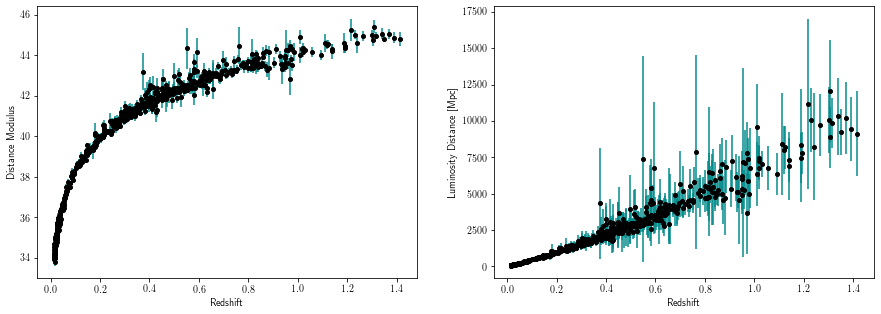

In [35]:
plt.subplots(1, 2, figsize=(15, 5))

# Plot distance modulus versus redshift (original data)
plt.subplot(1, 2, 1)
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")
plt.errorbar(zs, dist_mod, yerr=err_dist_mod, fmt='o', color='black', ecolor='darkcyan', markersize=4)

# Plot luminosity distance versus redshift
plt.subplot(1, 2, 2)
plt.xlabel("Redshift")
plt.ylabel("Luminosity Distance [Mpc]")
plt.errorbar(zs, dMpc, yerr=dMe, fmt='o', color='black', ecolor='darkcyan', markersize=4)
plt.show()

## <span style='color:deepskyblue'>Bayes' Theorem: Likelihood, Prior, Posterior (and Evidence...)</span>

The **conditional probability of A given that B is true** is denoted with $P(A|B)$ (read: *probability of A given B*). 
Did A happen? Then B has probability $P(B|A)$ of happening.

[**Bayes' Theorem**](https://en.wikipedia.org/wiki/Bayes%27_theorem) is simply a reflection of the symmetry of the concept of joint probability:

$$
P(A|B)P(B) = P(B|A)P(A)
$$

In physics, our goal is often to determine how likely the values of some parameters $\theta$ are, given how well they reproduce the data $D$. 
We write Bayes' theorem in the following equivalent form:

$$
P(\theta | D) = \frac{P(D|\theta)P(\theta)}{P(D)}
$$

The various terms conventionally take the names:

$$
\begin{aligned}
P(\theta | D) & && \text{Posterior}
\\
P(D | \theta)& && \text{Likelihood}
\\
P(\theta) & && \text{Prior}
\\
P(D) & && \text{Evidence}
\end{aligned}
$$

### <span style='color:deepskyblue'>Prior</span>

The *prior* quantifies our degree of prior belief in the model parameters. It can contain the results of previous experiments, or theoretical considerations (for instance, that certain parameters cannot be negative, etc.). 

We can have *strong priors* about something - the Sun still existing at night, see the comic below - or not.
When we do *not* have compelling prior knowledge about a parameter, we generally use a *non-informative* prior probability distribution, most often related to the [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

$$
\begin{aligned}
    \text{Uniform} & && \theta \in \text{Uniform}[\theta_{\rm min}, \theta_{\rm max}]
    \\
    \text{Log Uniform} & && \log\theta \in \text{Uniform}[\log\theta_{\rm min}, \log\theta_{\rm max}]
\end{aligned}
$$

You may sometimes hear that "the prior doesn't matter". While this is not strictly true, it is however true that in many instances the *likelihood* depends more dramatically on the parameters and will have a dominating contribution to the posterior. You are more than welcome to try different priors for the model parameters and see if and how your results change.

### <span style='color:deepskyblue'>Likelihood</span>

The measure of how well our model reproduces the data is the **likelihood** $\mathcal L$. For normal (=Gaussian), uncorrelated data $\mu_i$ with errors $\sigma_i$ ($i = \{1,580\}$), the likelihood is related to the famous [**chi-squared**](https://en.wikipedia.org/wiki/Chi-square_distribution) via

$$
P(D | \theta) \equiv \mathcal L = \exp\left(-\frac{\chi^2}{2}\right)
\qquad
\qquad
\boxed{
\chi^2 \equiv \sum_{i=1}^{580} \frac{\left(\mu_i^{(\rm theor)} - \mu_i^{(\rm obs)}\right)^2}{\sigma_i^2}
}
$$

A *high likelihood* corresponds to a *low chi squared*.

In principle, we could attack the problem brute-force: create a grid of values for $h$, $\Omega_m$, $\Omega_\Lambda$, calculate the likelihood for each combination, and create a profile for the likelihood. 

In practical cases, however, this is not only sub-optimal but sometimes **impossible**. Think of complicated models with 20+ free parameters (this is not that unusual in physics, by the way). Even a very coarse grained grid of 100 values for each parameter would result in more than$10^{40}$ (!!!) different parameter combination to be tested. You can probably understand why this is undesirable.

### <span style='color:deepskyblue'>Evidence</span>

This is the tricky bit. The evidence, which is "*the probability of observing certain data*", is not something that is easy to evaluate or interpret. This looks like a serious limitation to finding the:


### <span style='color:deepskyblue'>Posterior</span>

What does the data tell us about the model parameters? The answer is the *posterior probability distribution*, often (but not necessarily) expressed as (average $\pm$ standard deviation)

$$
\theta_i = \bar\theta_i \pm \sigma_i
$$

In other words, the posterior tells us how likely it is for the model parameters to have certain values, *given that we observe the data* $D$.

*This is the final goal of our analysis!*

<br>

![title](http://1.bp.blogspot.com/-tTx4HDejSww/ULcTeK9_V_I/AAAAAAAAA8g/PCYOH-eXGbk/s1600/frequentists_vs_bayesians.png)
![title](https://i.redd.it/5r0hwixt0m931.jpg)

## <span style='color:deepskyblue'>Markov-Chain Monte Carlo</span>

Markov-Chain Monte Carlo techniques are a class of methods to sample a probability distribution $P(x)$ - in our case $P(\theta | D)$ - provided that we can calculate a density $\mathcal F(x)$ **that is proportional to it** - in our case $P(\theta)P(D|\theta)$ = likelihood $\times$ prior. Among these, a very popular one is the [**Metropolis-Hastings**](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) algorithm, which is what we will use.

Schematically, the algorithm works as follows:
* Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and calculate the $\mathcal F_{\rm old}$
* Propose a new set of parameters $\theta_{\rm prop}$, calculate the new corresponding $\mathcal F_{\rm prop}$. How you propose the new parameters is not essential as long as the probability of going from one set of parameters to the next is the same as the inverse: $P(\theta_a \to \theta_b) = P(\theta_b \to \theta_a)$. For this, we normally take Gaussian displacements with some (relatively small) standard deviation.
* Compare the new and old likelihoods-priors:
    * If $\mathcal F_{\rm prop} > \mathcal F_{\rm old}$, accept the step: $\theta_{\rm new} = \theta_{\rm prop}$
    * Otherwise, accept with probability $P_{\rm accept} = \mathcal F_{\rm prop}/\mathcal F_{\rm old}$
* If accepted, $\theta_{\rm new} = \theta_{\rm prop}$ and record the step; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Update $\theta_{\rm old} = \theta_{\rm new}$
* Repeat

The MC chain keeps going until the desired number of steps or, ideally, when a suitable convergence test, like for example the [Gelman-Rubin test](https://bookdown.org/rdpeng/advstatcomp/monitoring-convergence.html), is satisfied. 
Today we will just set a limit to the total number of steps, but please feel free to implement and test your favourite convergence test!

Looking at equation (4), you can convince yourself that
$$
\frac{\mathcal L_a}{\mathcal L_b} = \exp\left(\frac{\chi_b^2 - \chi_a^2}{2}\right)
$$

(This is useful because $\chi^2$ can be large, so we want to avoid the likelihoods evaluating to `0.` -- computers don't like dividing by zero, unfortunately)
 
* Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and the corresponding chi squared $\chi_{\rm old}^2$ (to be clear, for us this implies calculating a series of 580 integrals and comparing each with the observed values)
* Propose new parameters $\theta_{\rm prop}$ and calculate the corresponding chi squared $\chi_{\rm prop}^2$
* Draw a random number $r \in [0,1]$
* Accept the step if 
$$
r < \exp\left(\frac{\chi_{\rm old}^2 - \chi_{\rm prop}^2}{2}\right) \frac{P(\theta)_{\rm prop}}{P(\theta)_{\rm old}}
$$
    * If accepted, update $\theta_{\rm old} = \theta_{\rm prop}$, and record; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Repeat

In [42]:
### <---- YOUR CODE GOES HERE
#Constants
omega_k=0
a=1

def sets(new_H_0, new_omega_m, new_omega_lam, iteration):
  #Old Parameters
  H_0 = 70 #in Mpc
  omega_m = 0.3 
  omega_lam = 0.7
  old_param = (H_0, omega_m, omega_lam)
  
  for i in range(iteration):

    param_old = list(old_param) # convert to tuple to be able to change them

    #Storing old variables
    mu_theory = []
    chi_range = 580
    squared_chi = []

    #Old Prior
    old_prior = np.random.normal(0, 1, 580) #normal so probability to go from a to b and from b to a are equal
    #plt.hist(old_prior, 100, density=True)
    #plt.show()
    sum_old_prior = np.sum(old_prior)
    #print(sum_old_prior)

    #Theoretical mu (old)
    for z in zs:
      mu_th = 5*math.log10(dL(z, param_old[0], param_old[1], omega_k, param_old[2], a)*10**5)
      mu_theory.append(mu_th)
      #print(mu_theory)

    #Calculating chi_squared (old)
    for i in range(chi_range):
        chi_squared = ((mu_theory[i]-dist_mod[i])**2)/(err_dist_mod[i])**2
        squared_chi.append(chi_squared)
        #print(squared_chi)

    #print(squared_chi)
    likelihood = np.sum(squared_chi)
    print("The old likelihood is: " + str(likelihood))

    #New parameters
    new_H_0 +=0.1
    new_omega_m +=0.001
    new_omega_lam +=0.01

    new_param = (new_H_0, new_omega_m, new_omega_lam)
    param_new = list(new_param)

    #Storing new variables
    new_theory_mu = []
    new_squared_chi=[]

    #New prior
    new_prior = np.random.normal(0, 1, 580)
    #plt.hist(new_prior, 100, density=True)
    #plt.show()
    sum_new_prior = np.sum(new_prior)
    #print(sum_new_prior)

    #Calculating new chi squared
    for z in zs:
      new_mu_th = 5*math.log10(dL(z, param_new[0], param_new[1], omega_k, param_new[2], a)*10**5)
      new_theory_mu.append(new_mu_th)
      #print(new_theory_mu)

    for i in range(chi_range):
      new_chi_squared =((new_theory_mu[i]-dist_mod[i])**2)/(err_dist_mod[i])**2
      new_squared_chi.append(new_chi_squared)

    #print(new_squared_chi)
    new_likelihood = np.sum(new_squared_chi)
    print("The new likelihood is: " + str(new_likelihood))
    #print(new_squared_chi)

    #random number
    r=0.2

    #Condition
    formula = np.exp(((likelihood-new_likelihood)/2)*(sum_new_prior/sum_old_prior)) # not sure if the product of the priors had to be included in the exponential 
    print(formula)

    #Deetrmining the most suitable parameter set
    if r <= formula:
      param_old[0] = param_new[0]
      param_old[1] = param_new[1]
      param_old[2] = param_new[2]
      old_param = tuple(param_old) #converting the list to a tuple

    print("The best fitting paramaters (H_0, omega_m, omega_lam) are: " + str(old_param))

sets(69, 0, 0, 300)

The old likelihood is: 1407229.3356965138
The new likelihood is: 6589124.7956706025
inf
The best fitting paramaters (H_0, omega_m, omega_lam) are: (69.1, 0.001, 0.01)
The old likelihood is: 6589124.7956706025
The new likelihood is: 5547756.225023471
inf
The best fitting paramaters (H_0, omega_m, omega_lam) are: (69.19999999999999, 0.002, 0.02)
The old likelihood is: 5547756.225023471
The new likelihood is: 4976866.998435057
inf
The best fitting paramaters (H_0, omega_m, omega_lam) are: (69.29999999999998, 0.003, 0.03)
The old likelihood is: 4976866.998435057
The new likelihood is: 4588446.745820724
0.0
The best fitting paramaters (H_0, omega_m, omega_lam) are: (69.29999999999998, 0.003, 0.03)
The old likelihood is: 4976866.998435057
The new likelihood is: 4296419.774602138
0.0
The best fitting paramaters (H_0, omega_m, omega_lam) are: (69.29999999999998, 0.003, 0.03)
The old likelihood is: 4976866.998435057
The new likelihood is: 4063669.084218754
inf
The best fitting paramaters (H_0, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: RuntimeWarning: overflow encountered in exp


The old likelihood is: 3131882.5277374247
The new likelihood is: 3046984.5086144377
inf
The best fitting paramaters (H_0, omega_m, omega_lam) are: (70.39999999999992, 0.014000000000000005, 0.13999999999999999)
The old likelihood is: 3046984.5086144377
The new likelihood is: 2968594.318037888
0.0
The best fitting paramaters (H_0, omega_m, omega_lam) are: (70.39999999999992, 0.014000000000000005, 0.13999999999999999)
The old likelihood is: 3046984.5086144377
The new likelihood is: 2895820.91633939
0.0
The best fitting paramaters (H_0, omega_m, omega_lam) are: (70.39999999999992, 0.014000000000000005, 0.13999999999999999)
The old likelihood is: 3046984.5086144377
The new likelihood is: 2827941.8409681353
0.0
The best fitting paramaters (H_0, omega_m, omega_lam) are: (70.39999999999992, 0.014000000000000005, 0.13999999999999999)
The old likelihood is: 3046984.5086144377
The new likelihood is: 2764363.5375698
inf
The best fitting paramaters (H_0, omega_m, omega_lam) are: (70.7999999999999, 

After completion of the programme, your MC chain will (*hopefully*) look something like this:

`#Omega_m  Omega_L  h   
 0.297     0.703    69.8
 0.285     0.715    70.1
 0.288     0.712    69.9
 ...
`

## <span style='color:deepskyblue'>Plotting: GetDist</span>

We will do the plots with [`GetDist`](https://getdist.readthedocs.io/en/latest/plot_gallery.html).

The plot gallery contains a lot of useful examples, you should be able to read them fairly easily and see which applies to your situation. Look for both (triangle) plots and for parameter estimation.

Note that many `GetDist` functions require arguments of type `MCSamples`; make sure you convert your lists accordingly.

In [14]:
pip install latex

  Created wheel for latex: filename=latex-0.7.0-cp37-none-any.whl size=7607 sha256=2351f053b03a2590dea27b2570838419799f162764c5cd234d4deb24b3e8728d
  Stored in directory: /root/.cache/pip/wheels/a5/00/74/5aed853dec3fbc45e9c9cf4949f664f1bd8b6f3e6def432019
  Created wheel for tempdir: filename=tempdir-0.7.1-cp37-none-any.whl size=2213 sha256=5c1b318919ae7ee71b19beb4689d3b6fe6d9a1cf311e612edc1e7f39234bfe64
  Stored in directory: /root/.cache/pip/wheels/7b/f2/40/6806964a69dfe3e46eff51b06a9a036af80b933479536fa295
  Created wheel for data: filename=data-0.4-cp37-none-any.whl size=7248 sha256=73b5cd7bf472fe63c078959173cb9c132d1bf4535154bb9789916fb93af0aef4
  Stored in directory: /root/.cache/pip/wheels/f6/09/e5/5afbc45fb0de471541092c7cd8b48d3483be68b1890955e6b9
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-cp37-none-any.whl size=2783 sha256=7f760f007f051d8cf1f585003c716bbe686c9ddc70b593dc46bb5f86296a1461
  Stored in directory: /root/.cache/pip/wheels/05/ef/eb/27a815601fa45bbb030

In [15]:
#Required for the latex text to work in the following boxes
! sudo apt-get install texlive-latex-recommended 
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
!apt install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  lib

Removed no burn in


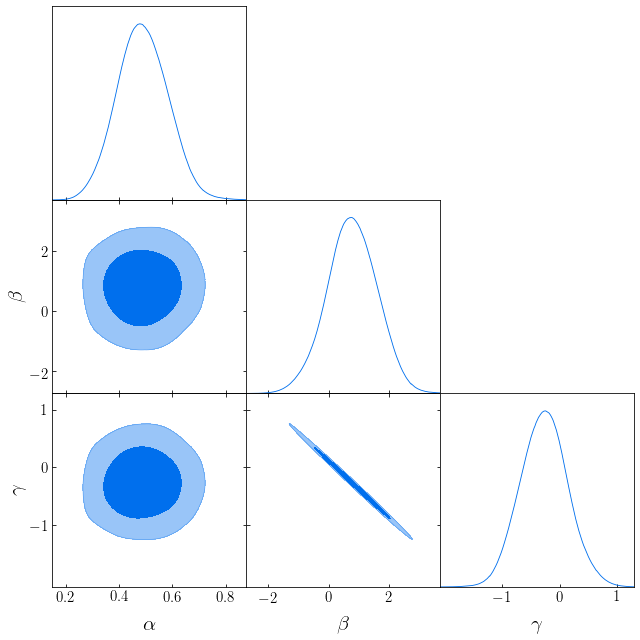

In [38]:
import getdist, IPython
from getdist import plots, MCSamples, loadMCSamples
#print('Version: ',getdist.__version__)
import numpy as np
import pylab
from matplotlib import rc
from random import random
from random import gauss
# If you want to use LaTeX in the labels. Not mandatory, but it looks nice ;)
pylab.rc('text',usetex=True) 

my_length = 1000;
par1, par2 = [], []

m1, m2, s1, s2 = random(), random(), random(), random()
for i in range(my_length):
    par1.append(gauss(m1, s1))
    par2.append(gauss(m2, s2))

par1 = np.array(par1)
par2 = np.array(par2)
par3 = (-0.5 + random()) * par1 + (-0.5 + random()) * par2

my_labels = [r'\alpha', r'\beta', r'\gamma']
my_names = [r'\name1', r'\name2', r'\name3']
my_samples = np.array([par1, par2, par3])

my_dim = 3

my_samples = np.transpose(np.reshape(my_samples,(my_dim,int(my_samples.size/my_dim))))
samples1 = MCSamples(samples = my_samples, labels = my_labels, names = my_names)

#Triangle corner plot
j = plots.getSubplotPlotter(subplot_size=3)
j.settings.axes_labelsize = 22
j.settings.axes_fontsize = 16
j.triangle_plot(samples1, filled = True)

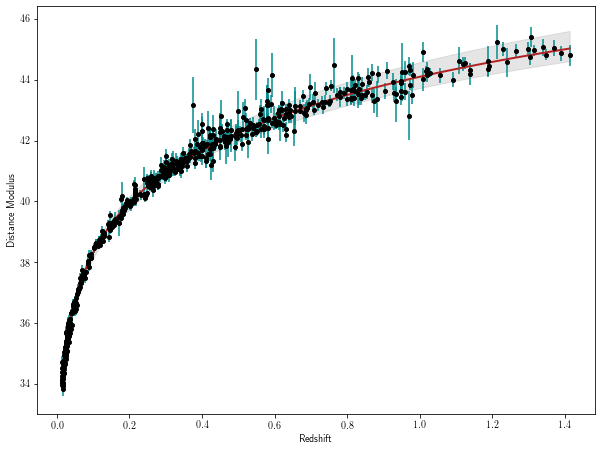

In [39]:
# example of theoretical curves
SPEED_OF_LIGHT = 299792.458 # in km/s

# Still need to add Omega_k!
def theor_luminosity_distance(z, h, OmegaM, OmegaL):
    return 10.**6 * SPEED_OF_LIGHT / h * (1.+z) * \
    integrate.quad(lambda x: 1. / np.sqrt(OmegaM * (1.+x)**3 + OmegaL), 0., z)[0]

def theor_distance_modulus(z, h, OmegaM, OmegaL):
    return 5. * (-1. + np.log10(theor_luminosity_distance(z, h, OmegaM, OmegaL)))
                 
zsort = sorted(zs)
d_best_fit, d_min, d_max = [], [], []

# YOUR RESULTS GO HERE!
for z in zsort:
    d_best_fit.append(theor_distance_modulus(z, 70., 0.3, 0.7))
    d_min.append(theor_distance_modulus(z, 75., 0.5, 0.5))
    d_max.append(theor_distance_modulus(z, 65., 0.1, 0.9))
    
plt.subplots(figsize=(10, 7.5))
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")

plt.errorbar(zs, dist_mod, yerr=err_dist_mod,\
             fmt='o', color='black', ecolor='darkcyan', markersize=4)
plt.plot(zsort, d_best_fit, color='firebrick',linewidth=2.)
plt.fill_between(zsort, d_min, d_max, color='grey', alpha=.2)
plt.show()